In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
from panel.interact import interact

In [2]:
%%html
<div class="penguin_container">
    <div class="peng">Pinguine</div>
    <img src="https://i.natgeofe.com/k/d3ea00a0-773b-437e-b7c6-a32f270b1b5a/adelie-penguin-jumping-ocean.jpg">
</div>
<style>
.penguin_container {
  position: relative;
  text-align: center;
  color: white;
}
.peng {
    text-align: center;
    
    position: absolute;
    color: yellow;
    font-size: 200px;
    top: 50%;
    left: 10%;
}
.peng:hover{
    animation: manimation 2s infinite;
}
@keyframes manimation {
  0%   {
        transform:rotate(0)}
  100% {
       transform:rotate(360deg)}
}</style>

In [3]:
df = pd.read_csv(
    "data/penguins_wNames.csv"
)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
 8   name               333 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 23.5+ KB


In [5]:
# NAs across the dataset
df.apply(lambda x: sum(x.isnull().values), axis = 0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
name                 0
dtype: int32

In [6]:
df = df.dropna()

In [7]:
df.hvplot.scatter(x='bill_length_mm', y='bill_depth_mm', by='species')

:NdOverlay   [species]
   :Scatter   [bill_length_mm]   (bill_depth_mm)

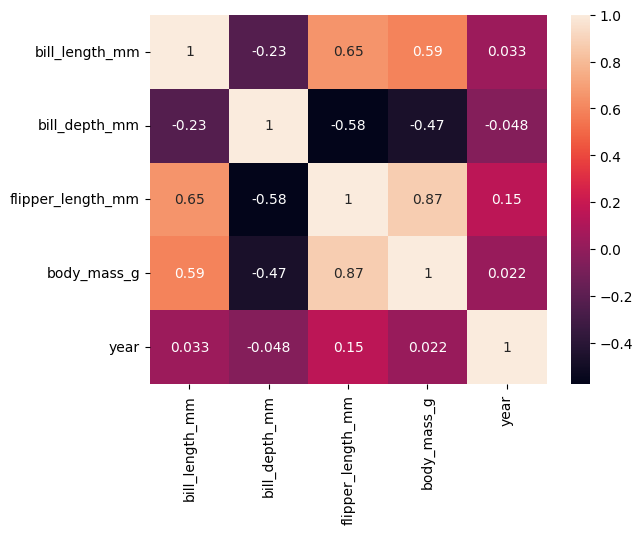

In [8]:
df_nums = df.select_dtypes(include = np.number)
df_corr= df_nums.dropna().corr()
corrplot = sns.heatmap(
    df_corr,
    annot = True
)

In [9]:
idf = df.interactive()

In [10]:
radiobuttons = {}
for item in ("sex", "island", "species", "year"):
    radiobuttons[item] = pn.widgets.RadioButtonGroup(
        name = "Y axis",
        options = df[item].unique().tolist(),
        button_type = "primary"
    )

In [11]:
radiobuttons["island"]

ModuleNotFoundError: No module named 'jupyter_bokeh'

RadioButtonGroup(button_type='primary', name='Y axis', options=['Torgersen', ...], value='Torgersen')

In [12]:
# imports
import pandas as pd
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
from panel.interact import interact

# options
islands = ["all"] + df["island"].unique().tolist()
sexes = ["all"] + df["sex"].unique().tolist()

# widgets
sex_select = pn.widgets.Select(
    options=sexes,
    name="Select Sex"
)
island_select = pn.widgets.RadioButtonGroup(
    options=islands,
    name="Select Island",
    button_type = "primary"
)

def create_plot(island, sex):
    
    if island == "all" and sex == "all":
        filtered_df = df.copy()
        
    elif island == "all":
        filtered_df = df[df["sex"] == sex]
        
    elif sex == "all":
        filtered_df = df[df["island"] == island]
        
    else:
        filtered_df = df[(df["island"] == island) & (df["sex"] == sex)]

    return filtered_df.hvplot.scatter(
        y="body_mass_g",
        x="flipper_length_mm",
        by="species",
        hover_cols="name"
    )

interact(
    create_plot,
    island=island_select,
    sex=sex_select
)

ModuleNotFoundError: No module named 'jupyter_bokeh'

Column
    [0] Column
        [0] RadioButtonGroup(button_type='primary', name='Select Island', options=['all', 'Torgersen', ...], value='all')
        [1] Select(options=['all', 'male', 'female'], value='all')
    [1] Row
        [0] HoloViews(NdOverlay, name='interactive01055')

In [13]:
# imports
import pandas as pd
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
from panel.interact import interact


# options
dimensions = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
groups = ["sex", "year", "island", "species"]


# widgets
y_axis_select = pn.widgets.Select(
    options = dimensions,
    name = "Y-Achse",
    value = dimensions[0]
)

x_axis_select = pn.widgets.Select(
    options = dimensions,
    name = "X-Achse",
    value = dimensions[1]
)

group_select = pn.widgets.Select(
    options = groups,
    name = "Gruppieren nach")


def create_plot(x_axis, y_axis, group_by, data = df):
    return df.hvplot.scatter(
        y = y_axis,
        x = x_axis,
        by = group_by,
        hover_cols = "name"
    )


interact(
    create_plot,
    x_axis = x_axis_select,
    y_axis = y_axis_select,
    group_by = group_select,
)

ModuleNotFoundError: No module named 'jupyter_bokeh'

Column
    [0] Column
        [0] Select(name='X-Achse', options=['bill_length_mm', ...], value='bill_depth_mm')
        [1] Select(name='Y-Achse', options=['bill_length_mm', ...], value='bill_length_mm')
        [2] Select(name='Gruppieren nach', options=['sex', 'year', ...], value='sex')
    [1] Row
        [0] HoloViews(NdOverlay, name='interactive01228')

## Splitting into training and test sets

In [15]:
from sklearn.model_selection import train_test_split
from pandas import get_dummies

y = df["species"].values
penguins_x = pd.get_dummies(df.drop(["species", "name"], axis = 1))
x = penguins_x.values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .1, random_state = 187)

## Defining a model

In [16]:
from sklearn.linear_model import LogisticRegression

steps = [("logreg", LogisticRegression(max_iter=1000))]

## Create the pipeline

In [17]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)
pipeline_fit = pipeline.fit(x_train, y_train)

## Evaluation

In [18]:
from sklearn.metrics import classification_report
prediction_tbl = pd.DataFrame(
{"true": y_test,
"pred": pipeline_fit.predict(x_test)})

prediction_tbl

classification_report = classification_report(
y_true = prediction_tbl.true,
y_pred = prediction_tbl.pred)

print(classification_report)

              precision    recall  f1-score   support

      Adelie       0.96      0.99      0.98       126
   Chinstrap       1.00      0.89      0.94        64
      Gentoo       0.97      1.00      0.99       110

    accuracy                           0.97       300
   macro avg       0.98      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300



In [19]:
species = df["species"].unique().tolist()
def predict(data, model=pipeline_fit):
    data_w_dummies = pd.get_dummies(data.drop(["name"], axis = 1))
    prediction = model.predict_proba(data_w_dummies)
    data = []

    # Iterate over observations and probabilities
    for i, probs in enumerate(prediction):
        observation_probs = {}

        # Iterate over species and corresponding probabilities
        for j, prob in enumerate(probs):
            observation_probs[species[j]] = round(prob, 4)

        # Append to data
        data.append(observation_probs)

    # Create a dataframe from the data list
    df_probabilities = pd.DataFrame(data)
    return df_probabilities

## "Real" Data

In [20]:
my_penguins = pd.read_csv(
    "data/made_up_penguins.csv"
)

In [21]:
my_penguins

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,name
0,Torgersen,39.1,18.7,181.0,3750.0,male,2007,Tugay
1,Dream,46.5,17.9,192.0,3500.0,female,2007,Lena
2,Dream,37.2,18.1,178.0,3900.0,male,2007,Finn
3,Biscoe,46.1,13.2,211.0,4500.0,female,2007,Nele
4,Biscoe,37.7,18.7,180.0,3600.0,male,2007,Dennis
5,Biscoe,50.0,16.3,230.0,5300.0,male,2007,Lukas
6,Dream,50.0,19.5,196.0,3900.0,male,2007,Stefan
7,Biscoe,53.2,17.4,234.0,5950.0,male,2007,Prof.Dr.Buecker


In [22]:
df_probabilities = predict(data=my_penguins)

# Add back again
df_probabilities["Name"] = my_penguins["name"]
print(df_probabilities)

   Adelie  Gentoo  Chinstrap             Name
0  0.9999  0.0001     0.0000            Tugay
1  0.0197  0.9792     0.0011             Lena
2  1.0000  0.0000     0.0000             Finn
3  0.0003  0.0011     0.9986             Nele
4  1.0000  0.0000     0.0000           Dennis
5  0.0000  0.0000     1.0000            Lukas
6  0.0024  0.9931     0.0045           Stefan
7  0.0000  0.0000     1.0000  Prof.Dr.Buecker


c:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
